# Automated Detection of Martian Dune Fields Using a Convolutional Neural Network
### A workflow by Cole Speed and Yiran Shen, University of Texas at Austin

Aeolian sand dunes are prevalent landforms on the surface of Mars. While attempts have been made to map their distribution in satellite images, it is likely that many remain [unmapped](https://pubs.usgs.gov/of/2007/1158/). In this project, we seek to develop a method to automatically identify dune fields on the surface of mars using deep learning. Specifically, we hope to achieve this through an image segmentation approach use of a convolutional neural (UNet) via a collection of images captured by the Mars Reconnaissance Orbiter.

<table><tr><td><img src="https://i.redd.it/zf8uugiibym31.jpg" width="450"/></td><td><img src = "https://thehill.com/sites/default/files/ca_nasabluedunes_041221nasa.jpg?width=1600" width = "525"</rd></table>

**Left.** Image of the Red Planet (Credit: NASA). **Right.** False-color image shows 'sea' of dunes near Mars' northern polar cap (Credit: NASA).

<table><tr><td><img src="https://cdn.mos.cms.futurecdn.net/QkuYeUftadiudcUbGJyKTh-970-80.jpg.webp" width ="900"></td><td><img src="https://mars.nasa.gov/system/resources/detail_files/7580_mars-curiosity-rover-high-dune-up-close-pia20168-full2.jpg" width = "890"</tr></table>

**Left.** Image captured by the Mars Reconnaisance Orbiter, shows barchan dunes (Credit: NASA/JPL/University of Arizona/USGS).**Right.** First dunes studied up-close, known as "High Dune" on NASA's Curiosity rover (Credit:NASA/JPL-Caltech).

# Background and Significance of Dune Fields on Mars

### Formation of Dunes on Mars and Variety of Dunes on the Martian Surface
Deposits on the surface of Mars provide the only available record of its temporal evolution. Many relict features remain well preserved on the Martian surface, documenting periods of actively flowing water and Martian wind regimes. One such landform-type are aeolian dunes, which form and evolve due to wind-driven sediment transport. A variety of dune types including those commonly seen on Earth (barchan, linear, cresentic) are also observed on the Martian surface. However, a variety of dune geometries exist on Mars that are not found on Earth. The distribution, configuration, and types of dunes on Mars provide history of changes on the Red Planet. NASA has even developed a way of monitoring [dune movement throught time](https://www.nasa.gov/mission_pages/MRO/multimedia/pia15680.html) across the Martian surface!

<center><img src = "https://www.nasa.gov/images/content/647405main_PIA15680-full.gif"></center>


## Goal: Dune Field Detection and Classification 
We would like to develop an automated approach for detecting and classifying martian dune fields through the application of deep learning and image segmentation. We will do so through the use of a convolutional neural network trained using hand-mapped dune field locations and high-resolution images captured by the THEMIS IR camera on the Mars Reconnaisance Orbitor. 

# Available Datasets

## Imagery
The Mars Reconnaisance Orbitor provides a rich dataset of visible imagery and thermal data from the Martian surface. The Thermal Emission Imaging System (THEMIS) IR camera affixed to the Mars Reconnaisance Orbiter provides the data used in this study. A global mosaic of THEMIS imagery sampled at 100x100m per pixel resolution is the primary dataset for model training, validation, and testing.

<table><tr><td><img src="https://themis.asu.edu/files/odyssey.jpg" width="300"/></td><td><img src = "https://astropedia.astrogeology.usgs.gov/download/Mars/Odyssey/THEMIS-Day-IR-Controlled-Mosaic/THEMIS_DayIR_ControlledMosaic_Hellas_65S060E_100mpp.cub/full.jpg" width = "900"</rd></table> 

**Left.** Mars Reconnaisance Orbiter, THEMIS camera imagery acquisition (Credit: NASA). **Right.** Global THEMIS Mosaic has 100x100m per pixel spatial resolution (Credit: NASA).

## Hand-mapped Dune Polygons

Previous workers have mapped the locations of dune fields as polygons based on visual inspection of imagery from the Mars Reconnaisance Oribiter. These data and information on the location of mapped Martian dune fields have been compiled into the [Mars Global Digital Dune Database: MC2–MC29](https://pubs.usgs.gov/of/2007/1158/). However, many dune fields on the Martian surface remain unmapped.
<img src="https://pubs.usgs.gov/of/2007/1158/imagesweb/minimap.jpg" width ="900">

## Previous work: Deep Learning Applied to Planetary Surface Processes 
Deep learning, and specifically convolutional neural networks, in the scope of planetary surfaces and surface processes has been applied primarily to automatically identify and measure craters on both the Moon and Mars ([Lee, 2019](10.1016/j.pss.2019.03.008); [Silbert et al., 2019](10.1016/j.icarus.2018.06.022)). However, automatic detection and classification of dune fields using CNNs has not been achieved.

We decided to use the UNet architecture to approach our problem after seeing its success in identifying and mapping craters on the Moon and Mars ([DeepMoon](https://github.com/silburt/DeepMoon) and [DeepMars](https://github.com/utplanets/deepmars) Github repositories)([Lee, 2019](10.1016/j.pss.2019.03.008); [Silbert et al., 2019](10.1016/j.icarus.2018.06.022)), which proved successful to determine the positions and sizes
of craters from Lunar and Martian digital elevation maps.

Their UNet convolutional neural network (and by design *our* neural network) is provided in the schematic below.

![](https://www.researchgate.net/profile/Alan-Jackson-2/publication/323597886/figure/fig1/AS:601386504953867@1520393124608/Sample-Moon-DEM-image-left-and-target-middle-from-our-dataset-with-the-two-overlaid_W640.jpg)

![](https://www.researchgate.net/profile/Alan-Jackson-2/publication/323597886/figure/fig2/AS:601386504957959@1520393124691/Convolutional-neural-network-CNN-architecture-based-on-UNET-Ronneberger-et-al_W640.jpg)


**In our project we implement a custom version of the UNET architecture
(Ronneberger et al., 2015).  This architecture consists
of a contracting path (left side) and expansive path (right side), joined
through multi-level skip connections (middle). Martian THEMIS images are input
to the contracting path and predictions are output from a final layer
following the expansive path.**

In the above schematic, boxes represent cross-sections of square feature maps. Each map's dimensions are indicated on its lower left, and its number of channels are indicated above it. In this diagram, the leftmost map is a 256 × 256 grayscale image sampled from the digital elevation map of the Moon, and the rightmost the CNN's binary ring mask prediction. We employ the same approach for highlighting regions that correspond to dune fields in the THEMIS imagery.

# Exploring the Data and Data Preprocessing
Prior to model construction, we visualize the data using mapping software (QGIS). We see that the dunes are strikingly different than the landscape surrounding them. We also notice that many dune fields are located within craters.

## Types of dunes seen in the THEMIS Imagery
Dune fields are clearly imaged by the THEMIS IR camera. Because the images are high-resolution (100x100m per pixel) individual dunes are clearly distinguishable.
![](http://drive.google.com/uc?export=view&id=14OYzrpMZddmZDOFlHQi8GKMnZcpSD6u9)

However, we observe a wide degree of variability in dune field geometry and prevalence. We will have to see if the CNN can identify this variability!
![](http://drive.google.com/uc?export=view&id=1Ex7dGZ5qwjetZBtz6HhUuKYRwSYfGlMa)


## Training data: Satellite imagery from the Mars Reconnaisance Orbiter
Training images were derived from the [THEMIS Day IR 100m Global Mosaic](http://www.mars.asu.edu/data/thm_dir_100m/), which provides imagery across the entire Martian surface at 100 meters per pixel. The full imagery dataset is ~22Gb

![](http://drive.google.com/uc?export=view&id=1MQkJj5TS4rfgpYfdeircD37mkwjMHFJK)

## Label data

Hand-mapped dune fields constitute the label data for this study. These data were obtained from the [Global Mars Dune Database](https://pubs.usgs.gov/of/2007/1158/), in which 550 dune fields have been mapped by hand based on visual interpretation of satellite imagery.


## Data preprocessing
**A *significant* amount of time for this project went into the data collection, cleaning and preparation.**

We first reprojected the label shapefiles in [QGIS](qgis.org) to ensure consistent coordinate reference systems between the labels and images. Mars Simple Cylindrical coordinates were used.

A binary raster was generated from the label feature class where dune field polygon pixels have values of 1 while other pixels have Null values.
![](http://drive.google.com/uc?export=view&id=1xvBlfrtTaTkBTxKNzdgv53ffLUH9L5Q9)

Due of the file size of the original THEMIS mosaic (~20Gb), we first cropped the satellite image and label rasters to a region which included the majority of the mapped dune field locations **See Above**. 

We then generated image and label 'tiles' with dimensions of 256x256 pixels using a series of python scrips in combination with the open-source GNU IMAGE MANIPULATION PROGRAM ([GIMP](https://gimp.org)). These scripts can be found on [Github](https://github.com/UT-GEOML/Machine-Learners/tree/main/class_project/data/scripts/core_scripts).

This workflow resulted in 78,337 image and label tiles. For training purposes, we filtered the image tiles to include only images that contained at least one (or a portion of one) dune field. This resulted in a total dataset of 1116 image/label pairs.


# Importing and visualizing the data
The input data file <code>mars_dunes.npz</code> (about 1Gb) is available at https://drive.google.com/file/d/1mBn8mQ1O51EprTpXSNQtK-VSmF3wD7Z-/view?usp=sharing

Using [Google Drive](https://drive.google.com/), you can create a shortcut for a shared file:
1. Right click the file.
2. Click **Add shortcut to Drive**.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np

loaded = np.load('/content/gdrive/My Drive/mars_dunes.npz')
data = loaded['data']
labels = loaded['labels']

print(data.shape,labels.shape)

(1116, 256, 256) (1116, 256, 256)


The are 1116 two-dimensional training images with dimensions $256 \times 256$. We have only included image tiles that have labels, which excludes a large portion of images tiles. Below, we visualize a random sampling of image tiles to better understand our training dataset.

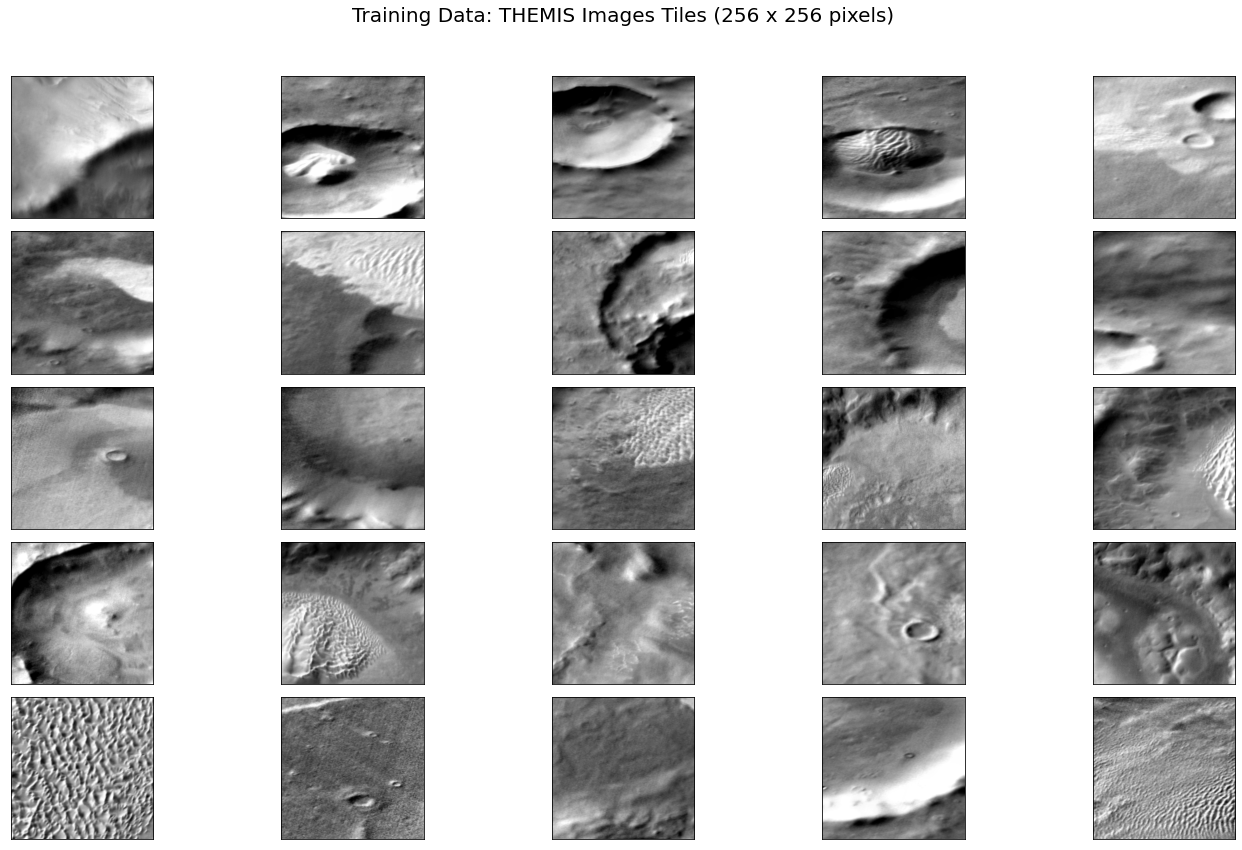

In [ ]:
import matplotlib.pyplot as plt 
import random

def plot_mars_image(data,title):
    random.seed(2000)
    
    fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 12),
                            subplot_kw={'xticks': [], 'yticks': []})
    for ax in axs.flat:
        pick = random.randint(0,data.shape[0]-1)
        ax.imshow(data[pick,:,:],cmap='gray')
    plt.tight_layout()
    fig.suptitle(title,fontsize=20)
    plt.subplots_adjust(top=0.9)
    plt.show()
    
plot_mars_image(data,'Training Data: THEMIS Images Tiles (256 x 256 pixels)')

We can also look at the corresponding labels that will be used in the training and validation of our neural network. We visualize the labels corresponding to the same random sampling of dune fields below.


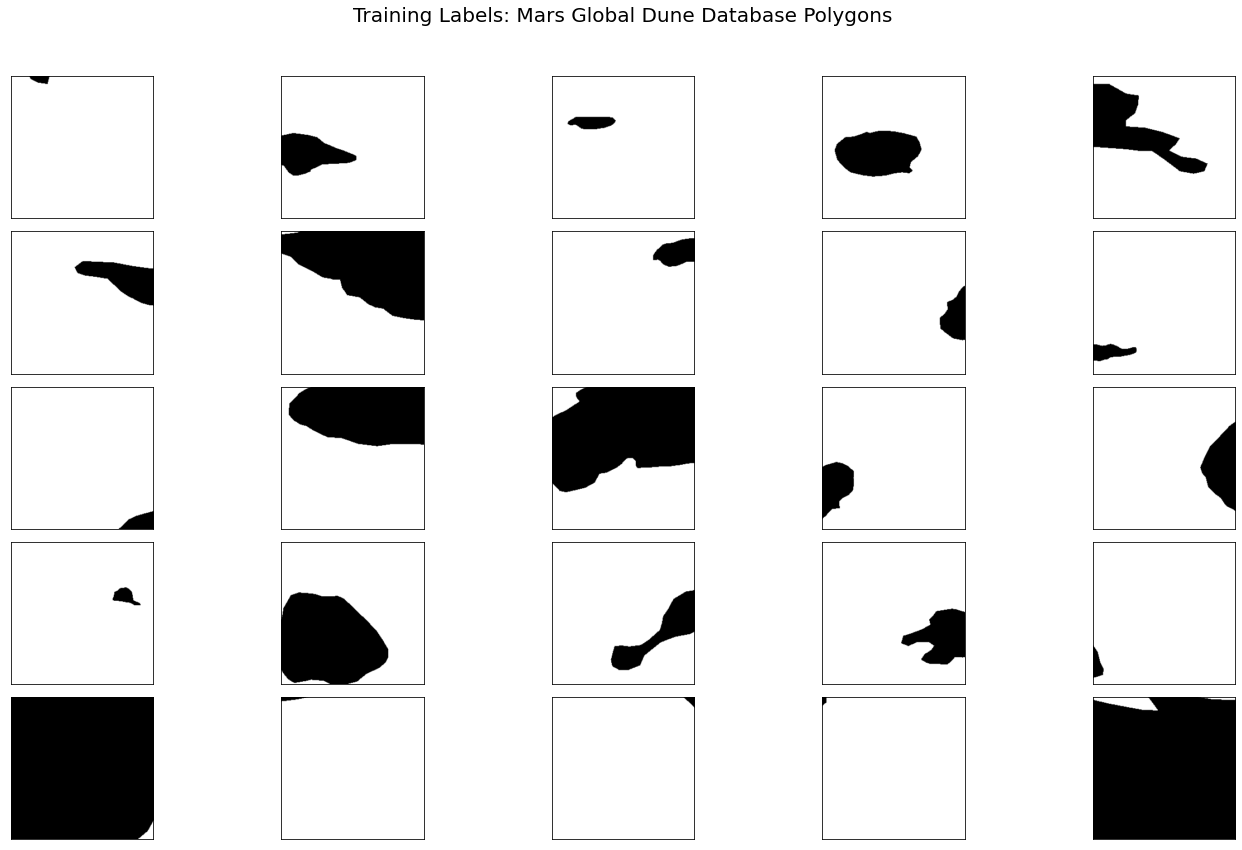

In [ ]:
def plot_dune(data,title):
    fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 12),
                            subplot_kw={'xticks': [], 'yticks': []})
    random.seed(2000)
    for ax in axs.flat:
        pick = random.randint(0,data.shape[0]-1)
        ax.imshow(data[pick,:,:],cmap='gray_r',interpolation='bilinear')
    plt.tight_layout()
    fig.suptitle(title,fontsize=20)
    plt.subplots_adjust(top=0.9)
    plt.show()
    
plot_dune(labels,'Training Labels: Mars Global Dune Database Polygons')

Notice that most image/label tiles only capture a portion of a dune field (some only a very small portion). Below we visualize the image data and labels together.


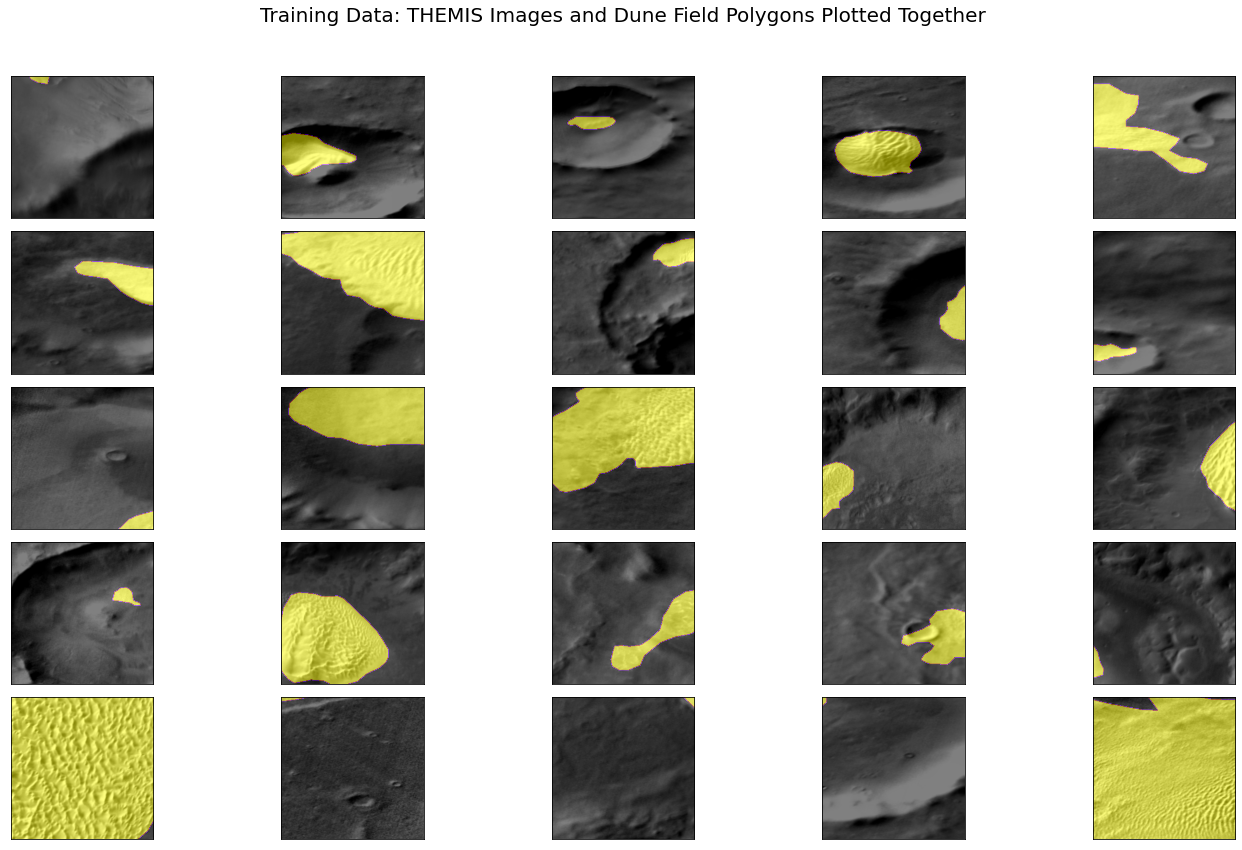

In [ ]:
def plot_mars_dune(data,labels,title):
    fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 12),
                            subplot_kw={'xticks': [], 'yticks': []})
    random.seed(2000)
    for ax in axs.flat:
        pick = random.randint(0,data.shape[0]-1)
        ax.imshow(data[pick,:,:],cmap='gray')
        # overlay fault labels with alpha for transparency
        ax.imshow(labels[pick,:,:],cmap='gnuplot',alpha=0.5)
    plt.tight_layout()
    fig.suptitle(title,fontsize=20)
    plt.subplots_adjust(top=0.9)
    plt.show()
    
plot_mars_dune(data,labels,'Training Data: THEMIS Images and Dune Field Polygons Plotted Together')

# Preparing data for training

To prepare the data for training, we will first normalize each image by subtracting the mean value and dividing by the standard deviation, resulting in each image having a mean of 0 and a standard deviation of 1. A fourth dimension of 1 is added to indicate that the input dataset has one channel.


In [ ]:
# normalize data
mean = data.mean(axis=(1,2))[:,np.newaxis,np.newaxis]
std = data.std(axis=(1,2))[:,np.newaxis,np.newaxis]
data_normal = (data-mean)/std

#add dimension of 1
data_normal = np.expand_dims(data_normal,axis=3)
data_normal.shape


(1116, 256, 256, 1)

We randomly split the data for training (80%) and validation (20%).

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data for training and validation
data_train,data_valid,labels_train,labels_valid = \
train_test_split(data_normal,labels,test_size=0.2,shuffle= True)

# Designing the convolutional neural network (Unet)

We are going to use a convolutional neural network (CNN) accelerated on GPUs.

When used [Google Colab](https://colab.research.google.com) for this project, utilizing their GPU for accelerating the training of our CNN.

In [ ]:
from tensorflow import config

# setup GPU card
gpus = config.list_physical_devices('GPU')

if gpus:
    for gpu in gpus:
        print(gpu)
        # dynamic memory allocation
        config.experimental.set_memory_growth(gpu,True)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


Now we can design our Unet-based neural network.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

nb_filter = [16,32,64,128,256]
def Unet(nb_filter):
    keras.backend.clear_session()
    
    # can take arbitrary input size
    image = keras.Input((None,None,1),name='input')
    
    conv0 = layers.Conv2D(nb_filter[0], (3,3), padding='same')(image)
    conv0 = layers.BatchNormalization()(conv0)
    conv0 = layers.Activation('relu')(conv0)
    conv0 = layers.Conv2D(nb_filter[0], (3,3), padding='same')(conv0)
    conv0 = layers.BatchNormalization()(conv0)
    conv0 = layers.Activation('relu')(conv0)

    pool0 = layers.MaxPooling2D(pool_size=(2,2))(conv0)

    conv1 = layers.Conv2D(nb_filter[1], (3,3), padding='same')(pool0)
    conv1 = layers.BatchNormalization()(conv1)
    conv1 = layers.Activation('relu')(conv1)
    conv1 = layers.Conv2D(nb_filter[1], (3,3), padding='same')(conv1)
    conv1 = layers.BatchNormalization()(conv1)
    conv1 = layers.Activation('relu')(conv1)
    
    pool1 = layers.MaxPooling2D(pool_size=(2,2))(conv1)

    conv2 = layers.Conv2D(nb_filter[2], (3,3), padding='same')(pool1)
    conv2 = layers.BatchNormalization()(conv2)
    conv2 = layers.Activation('relu')(conv2)
    conv2 = layers.Conv2D(nb_filter[2], (3,3), padding='same')(conv2)
    conv2 = layers.BatchNormalization()(conv2)
    conv2 = layers.Activation('relu')(conv2)
    
    pool2 = layers.MaxPooling2D(pool_size=(2,2))(conv2)

    conv3 = layers.Conv2D(nb_filter[3], (3,3), padding='same')(pool2)
    conv3 = layers.BatchNormalization()(conv3)
    conv3 = layers.Activation('relu')(conv3)
    conv3 = layers.Conv2D(nb_filter[3], (3,3), padding='same')(conv3)
    conv3 = layers.BatchNormalization()(conv3)
    conv3 = layers.Activation('relu')(conv3)
    
    pool3 = layers.MaxPooling2D(pool_size=(2,2))(conv3)

    conv4 = layers.Conv2D(nb_filter[4], (3,3), padding='same')(pool3)
    conv4 = layers.BatchNormalization()(conv4)
    conv4 = layers.Activation('relu')(conv4)
    conv4 = layers.Conv2D(nb_filter[4], (3,3), padding='same')(conv4)
    conv4 = layers.BatchNormalization()(conv4)
    conv4 = layers.Activation('relu')(conv4)

    up5 = layers.concatenate([layers.UpSampling2D(size=(2,2))(conv4), conv3], axis=-1)

    conv5 = layers.Conv2D(nb_filter[3], (3,3), padding='same')(up5)
    conv5 = layers.BatchNormalization()(conv5)
    conv5 = layers.Activation('relu')(conv5)
    conv5 = layers.Conv2D(nb_filter[3], (3,3), padding='same')(conv5)
    conv5 = layers.BatchNormalization()(conv5)
    conv5 = layers.Activation('relu')(conv5)

    up6 = layers.concatenate([layers.UpSampling2D(size=(2,2))(conv5), conv2], axis=-1)

    conv6 = layers.Conv2D(nb_filter[2], (3,3), padding='same')(up6)
    conv6 = layers.BatchNormalization()(conv6)
    conv6 = layers.Activation('relu')(conv6)
    conv6 = layers.Conv2D(nb_filter[2], (3,3), padding='same')(conv6)
    conv6 = layers.BatchNormalization()(conv6)
    conv6 = layers.Activation('relu')(conv6)

    up7 = layers.concatenate([layers.UpSampling2D(size=(2,2))(conv6), conv1], axis=-1)

    conv7 = layers.Conv2D(nb_filter[1], (3,3), padding='same')(up7)
    conv7 = layers.BatchNormalization()(conv7)
    conv7 = layers.Activation('relu')(conv7)
    conv7 = layers.Conv2D(nb_filter[1], (3,3), padding='same')(conv7)
    conv7 = layers.BatchNormalization()(conv7)
    conv7 = layers.Activation('relu')(conv7)

    up8 = layers.concatenate([layers.UpSampling2D(size=(2,2))(conv7), conv0], axis=-1)
    
    conv8 = layers.Conv2D(nb_filter[0], (3,3), padding='same')(up8)
    conv8 = layers.BatchNormalization()(conv8)
    conv8 = layers.Activation('relu')(conv8)
    conv8 = layers.Conv2D(nb_filter[0], (3,3), padding='same')(conv8)
    conv8 = layers.BatchNormalization()(conv8)
    conv8 = layers.Activation('relu')(conv8)

    conv9 = layers.Conv2D(1, (1,1), activation='sigmoid')(conv8)
    
    model = keras.Model(inputs=[image], outputs=[conv9])

    return model

We take a look at the model constuction, below.

In [ ]:
model=Unet(nb_filter)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 1 160         input[0][0]                      
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 1 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 1 0           batch_normalization[0][0]        
______________________________________________________________________________________________

Our model has 1,968,225 total parameters.

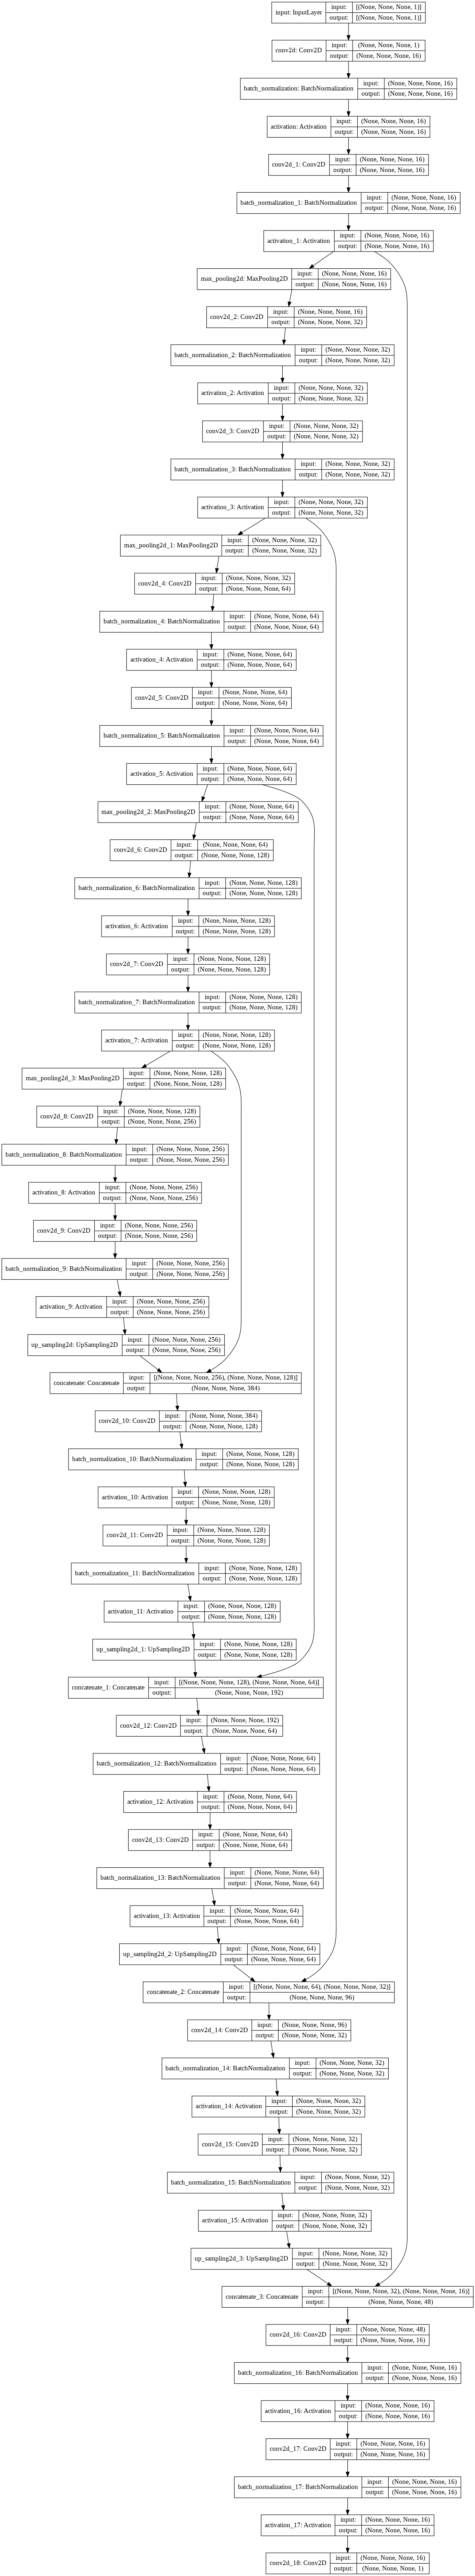

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

# Model training

Now we are ready to train our model. As before, we will use orginal size (1116 image tiles) of the dataset, cross-entropy as the loss function (applied pixel-by-pixel in the image), and Adam as the optimization algorithm.

In [ ]:
model0=Unet(nb_filter)
model0.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Fit the model
batch_size = 40
epochs = 50
fit0 = model0.fit(data_train,labels_train,
                validation_data=(data_valid,labels_valid),
                epochs=epochs,
                batch_size=batch_size)

Epoch 1/50
23/23 [==============================] - 53s 623ms/step - loss: 0.4721 - accuracy: 0.8088 - val_loss: 7.3836 - val_accuracy: 0.1154
Epoch 2/50
23/23 [==============================] - 10s 431ms/step - loss: 0.2846 - accuracy: 0.9144 - val_loss: 4.4437 - val_accuracy: 0.2130
Epoch 3/50
23/23 [==============================] - 10s 434ms/step - loss: 0.2620 - accuracy: 0.9112 - val_loss: 0.7318 - val_accuracy: 0.5912
Epoch 4/50
23/23 [==============================] - 10s 440ms/step - loss: 0.2530 - accuracy: 0.9107 - val_loss: 0.3456 - val_accuracy: 0.8982
Epoch 5/50
23/23 [==============================] - 10s 444ms/step - loss: 0.2320 - accuracy: 0.9180 - val_loss: 0.3209 - val_accuracy: 0.8949
Epoch 6/50
23/23 [==============================] - 10s 449ms/step - loss: 0.2108 - accuracy: 0.9268 - val_loss: 0.3087 - val_accuracy: 0.8939
Epoch 7/50
23/23 [==============================] - 10s 456ms/step - loss: 0.2090 - accuracy: 0.9261 - val_loss: 0.2653 - val_accuracy: 0.9021

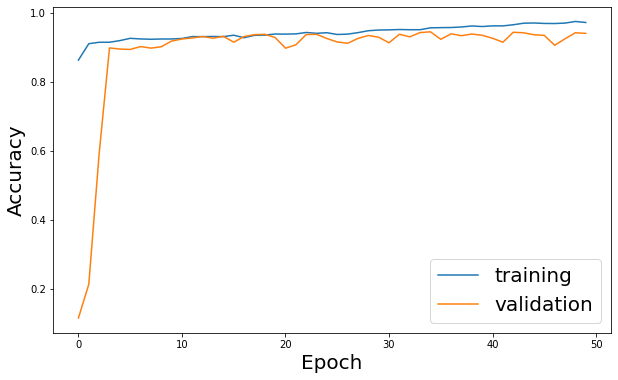

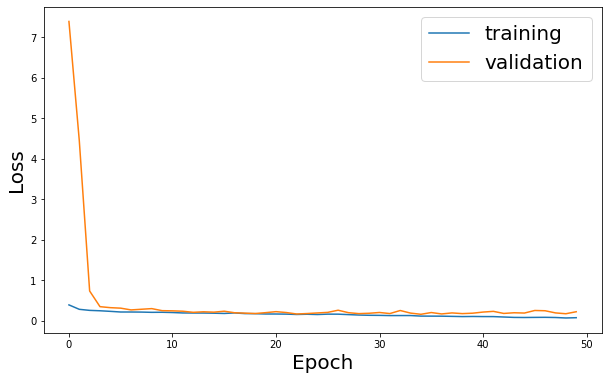

In [ ]:
def plot_history(history):
    fig = plt.figure(figsize=(10,6))
    plt.plot(history['accuracy'],label='training')
    plt.plot(history['val_accuracy'],label='validation')
    plt.ylabel('Accuracy',fontsize=20)
    plt.xlabel('Epoch',fontsize=20)
    plt.legend(fontsize=20)
    plt.show()

    # summarize history for loss
    fig = plt.figure(figsize=(10,6))
    plt.plot(history['loss'],label='training')
    plt.plot(history['val_loss'],label='validation')
    plt.ylabel('Loss',fontsize=20)
    plt.xlabel('Epoch',fontsize=20)
    plt.legend(fontsize=20)
    plt.show()

plot_history(fit0.history)

# Data augmentation: A larger training dataset and (hopefully) improved training
More data is always (usually?) better. We now extend the dataset to be **four** times larger than our orginal one by flipping and rotating the dataset.

In [ ]:
# flipping data
f_data = np.flip(data,axis=1)
f_labels = np.flip(labels,axis=1)
# rotate data
r_data = np.flip(f_data,axis=0)
r_labels = np.flip(f_labels,axis=0)
# flipping again
h_data = np.flip(data,axis=0)
h_labels = np.flip(labels,axis=0)

t_data = np.concatenate([data, r_data, h_data, f_data], axis=0)
t_labels = np.concatenate([labels, r_labels, h_labels, f_labels], axis=0)
print(data.shape,labels.shape)
print(t_data.shape,t_labels.shape)

# normalize data
mean = t_data.mean(axis=(1,2))[:,np.newaxis,np.newaxis]
std = t_data.std(axis=(1,2))[:,np.newaxis,np.newaxis]
t_data_normal = (t_data-mean)/std

#add dimension of 1
t_data = np.expand_dims(t_data_normal,axis=3)
t_data.shape

(1116, 256, 256) (1116, 256, 256)
(4464, 256, 256) (4464, 256, 256)


(4464, 256, 256, 1)

In [ ]:
# Split the data for training and validation
t_data_train,t_data_valid,t_labels_train,t_labels_valid = \
train_test_split(t_data,t_labels,test_size=0.2,shuffle= True)

t_data_train.shape

(3571, 256, 256, 1)

In [ ]:
model=Unet(nb_filter)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit the model
batch_size = 40
epochs = 50
fit = model.fit(t_data_train,t_labels_train,
                validation_data=(t_data_valid,t_labels_valid),
                epochs=epochs,
                batch_size=batch_size)

Epoch 1/50
90/90 [==============================] - 26s 264ms/step - loss: 0.5931 - accuracy: 0.7568 - val_loss: 0.6724 - val_accuracy: 0.5428
Epoch 2/50
90/90 [==============================] - 22s 245ms/step - loss: 0.3411 - accuracy: 0.9216 - val_loss: 0.3834 - val_accuracy: 0.8745
Epoch 3/50
90/90 [==============================] - 22s 245ms/step - loss: 0.2761 - accuracy: 0.9210 - val_loss: 0.2695 - val_accuracy: 0.9114
Epoch 4/50
90/90 [==============================] - 22s 245ms/step - loss: 0.2305 - accuracy: 0.9281 - val_loss: 0.2808 - val_accuracy: 0.9069
Epoch 5/50
90/90 [==============================] - 22s 245ms/step - loss: 0.2135 - accuracy: 0.9261 - val_loss: 0.2335 - val_accuracy: 0.9137
Epoch 6/50
90/90 [==============================] - 22s 245ms/step - loss: 0.1951 - accuracy: 0.9320 - val_loss: 0.2940 - val_accuracy: 0.8656
Epoch 7/50
90/90 [==============================] - 22s 245ms/step - loss: 0.2034 - accuracy: 0.9256 - val_loss: 0.2175 - val_accuracy: 0.9216

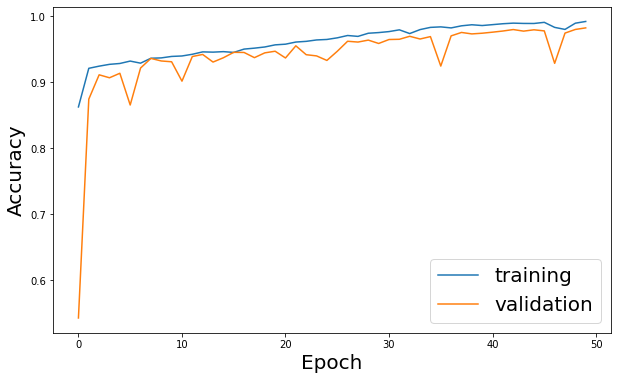

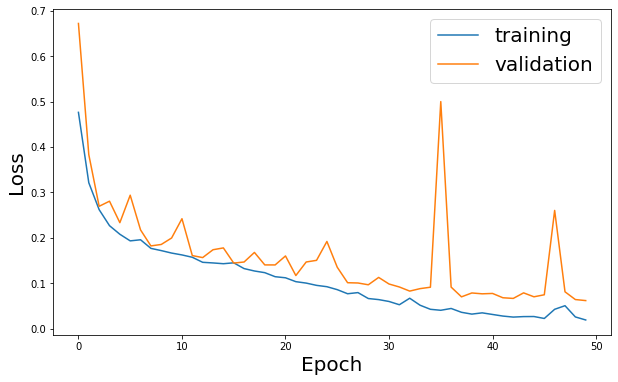

In [ ]:
plot_history(fit.history)

# Cross entropy balancing as the other loss function in our model 

Since it is evident that the number of background shapes in any given detection image is usually more than the number of dune class instances, training a neural network might make it biased to outputting background class more compared to dune class and it may affects the performance of a neural net. The problem of class imbalance can be solved by adding more instances of the less dominant class in training data.

![](https://miro.medium.com/max/1060/1*yEw6qiz5s6NuOvfcRfTtHw.png)


In [ ]:
import tensorflow as tf
def _to_tensor(x, dtype):
    x = tf.convert_to_tensor(x)
    if x.dtype != dtype:
        x = tf.cast(x, dtype)
    return x

def cross_entropy_balanced(y_true, y_pred):
    from keras import backend as K
    _epsilon = _to_tensor(K.epsilon(), y_pred.dtype.base_dtype)
    y_pred   = tf.clip_by_value(y_pred, _epsilon, 1 - _epsilon)
    y_pred   = tf.math.log(y_pred/ (1 - y_pred))
    y_true = tf.cast(y_true, tf.float32)

    count_neg = tf.reduce_sum(1. - y_true)
    count_pos = tf.reduce_sum(y_true)
    beta = count_neg / (count_neg + count_pos)
    pos_weight = beta / (1 - beta)

    cost = tf.nn.weighted_cross_entropy_with_logits(logits=y_pred, labels=y_true, pos_weight=pos_weight)
    cost = tf.reduce_mean(cost * (1 - beta))

    return tf.where(tf.equal(count_pos, 0.0), 0.0, cost)

In [ ]:
model1=Unet(nb_filter)
model1.compile(loss=cross_entropy_balanced,
              #optimizer='adam',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])
# Fit the model
batch_size = 40
epochs = 50
fit = model1.fit(t_data_train,t_labels_train,
                validation_data=(t_data_valid,t_labels_valid),
                epochs=epochs,
                batch_size=batch_size)

Epoch 1/50
90/90 [==============================] - 25s 253ms/step - loss: 0.0998 - accuracy: 0.7043 - val_loss: 0.1735 - val_accuracy: 0.7205
Epoch 2/50
90/90 [==============================] - 22s 245ms/step - loss: 0.0763 - accuracy: 0.8120 - val_loss: 0.1947 - val_accuracy: 0.8844
Epoch 3/50
90/90 [==============================] - 22s 245ms/step - loss: 0.0702 - accuracy: 0.8483 - val_loss: 0.1151 - val_accuracy: 0.9137
Epoch 4/50
90/90 [==============================] - 22s 245ms/step - loss: 0.0697 - accuracy: 0.8491 - val_loss: 0.1371 - val_accuracy: 0.9171
Epoch 5/50
90/90 [==============================] - 22s 245ms/step - loss: 0.0635 - accuracy: 0.8593 - val_loss: 0.0714 - val_accuracy: 0.8998
Epoch 6/50
90/90 [==============================] - 22s 245ms/step - loss: 0.0613 - accuracy: 0.8663 - val_loss: 0.0761 - val_accuracy: 0.8762
Epoch 7/50
90/90 [==============================] - 22s 245ms/step - loss: 0.0606 - accuracy: 0.8754 - val_loss: 0.0793 - val_accuracy: 0.9165

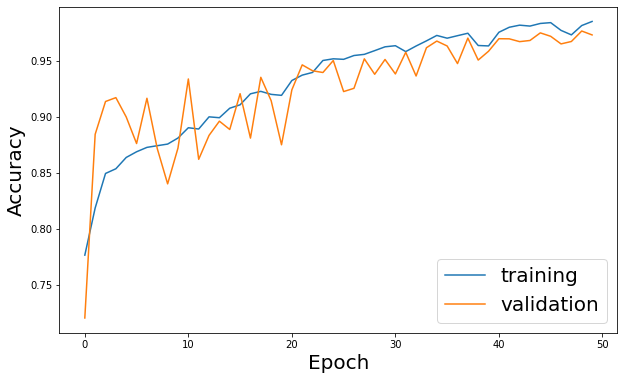

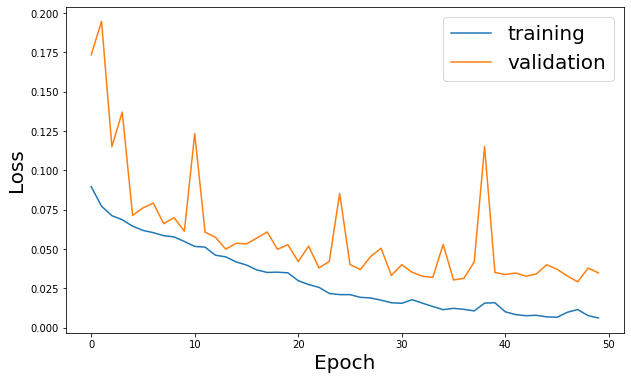

In [ ]:
plot_history(fit.history)

# Save the model
We save our model termed "deepdunes_model.h5", so that it can be reload throught the Google driver for further testing.

In [ ]:
#Save model
keras.models.save_model(model,'deepdunes_model.h5',save_format='h5')
# #Load the model back with model
# model = keras.models.load_model('deepdunes_model.h5')

# Checking the results compared to the hand-mapped dune field locations

In [ ]:
prediction = model.predict(t_data_valid)

# thresholding probability
labels_pred = prediction
labels_pred[prediction>=0.5]=1
labels_pred[prediction<0.5]=0

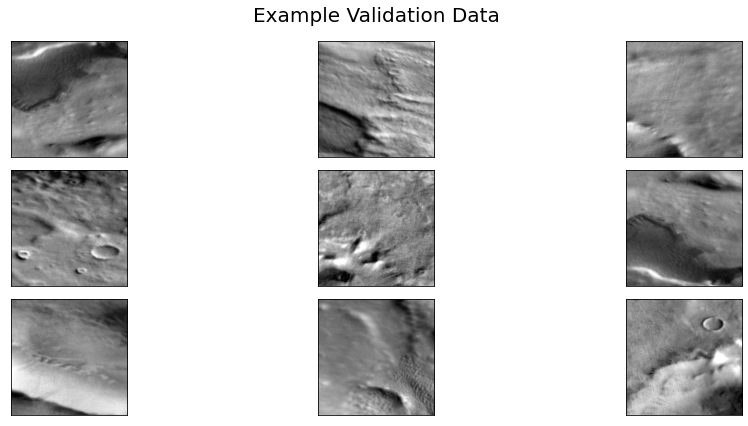

In [ ]:
plot_dune(t_data_valid[:,:,:,0],'Example Validation Data')

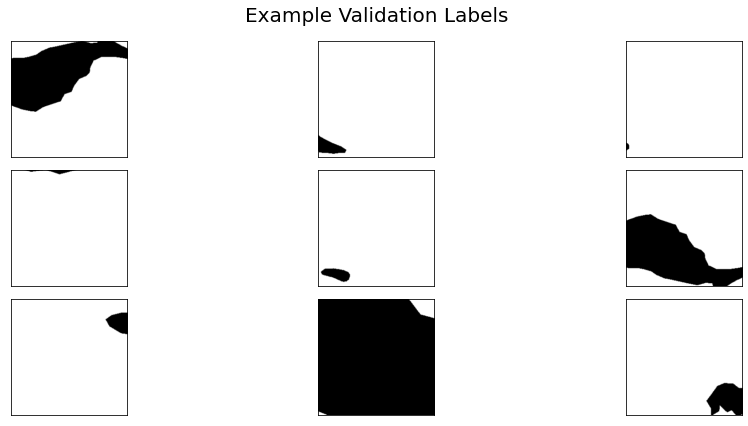

In [ ]:
plot_dune(t_labels_valid,'Example Validation Labels')

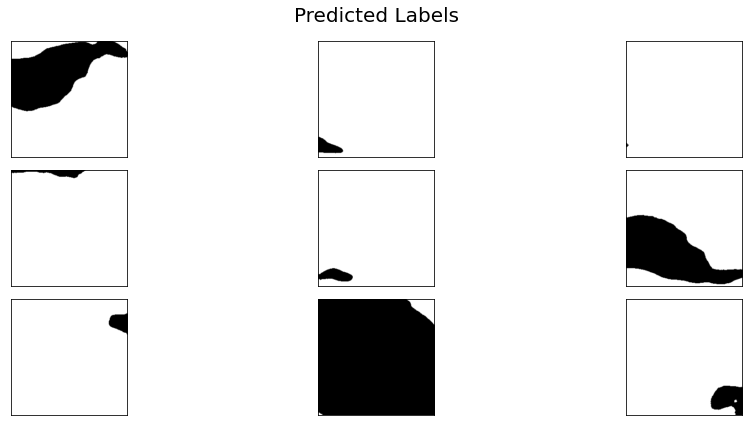

In [ ]:
plot_dune(labels_pred[:,:,:,0],'Predicted Dune Field Labels')

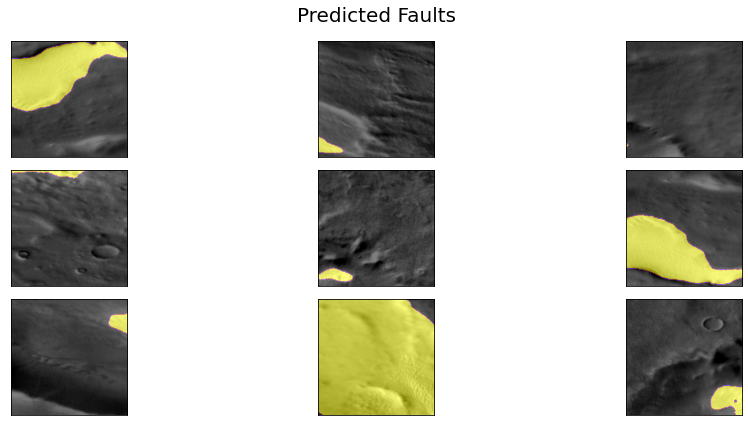

In [ ]:
plot_mars_dune(t_data_valid[:,:,:,0],labels_pred[:,:,:,0],'Predicted Labels')

# Testing on full image dataset to identify additional dune field candidates

We would like to know if there are any unmapped dune fields on Mars. To find potential candidates we can apply our model to the full unlabeled dataset (~76,000) 256 x 256 image tiles. We had to divide these into 38 files containing 2,000 tiles per file due to RAM and disk limitations. A shortcut to the image files can be found [here](https://drive.google.com/drive/folders/1n7ql3s-cMdScOIPDxqdGN9g8wx41wxu-?usp=sharing). The model 'deepdunes_model.hf' can also be downloaded (or a shortcut can be made) [here](https://drive.google.com/file/d/1DHUSRwxLxiCDw12wU4MDuIgzr6466CO6/view?usp=sharing)

In [ ]:
import keras
import numpy as np
#Load model
model = keras.models.load_model('/content/gdrive/My Drive/deepdunes_model.h5')

In [ ]:
#function for loading in each 2000 image .npz (38 total files)

n = np.arange(37)
file_path_list = []
for i in range(len(n)):
  filename = '/content/gdrive/My Drive/mars_dunes_full_ds/mars_dunes_full_ds_'+str(i)+'.npz'
  file_path_list.append(filename)

We now use our model to 'detect' pixels that may correspond to unmapped dune fields. This is only a preliminary result and needs more work!

/content/gdrive/My Drive/mars_dunes_full_ds/mars_dunes_full_ds_0.npz


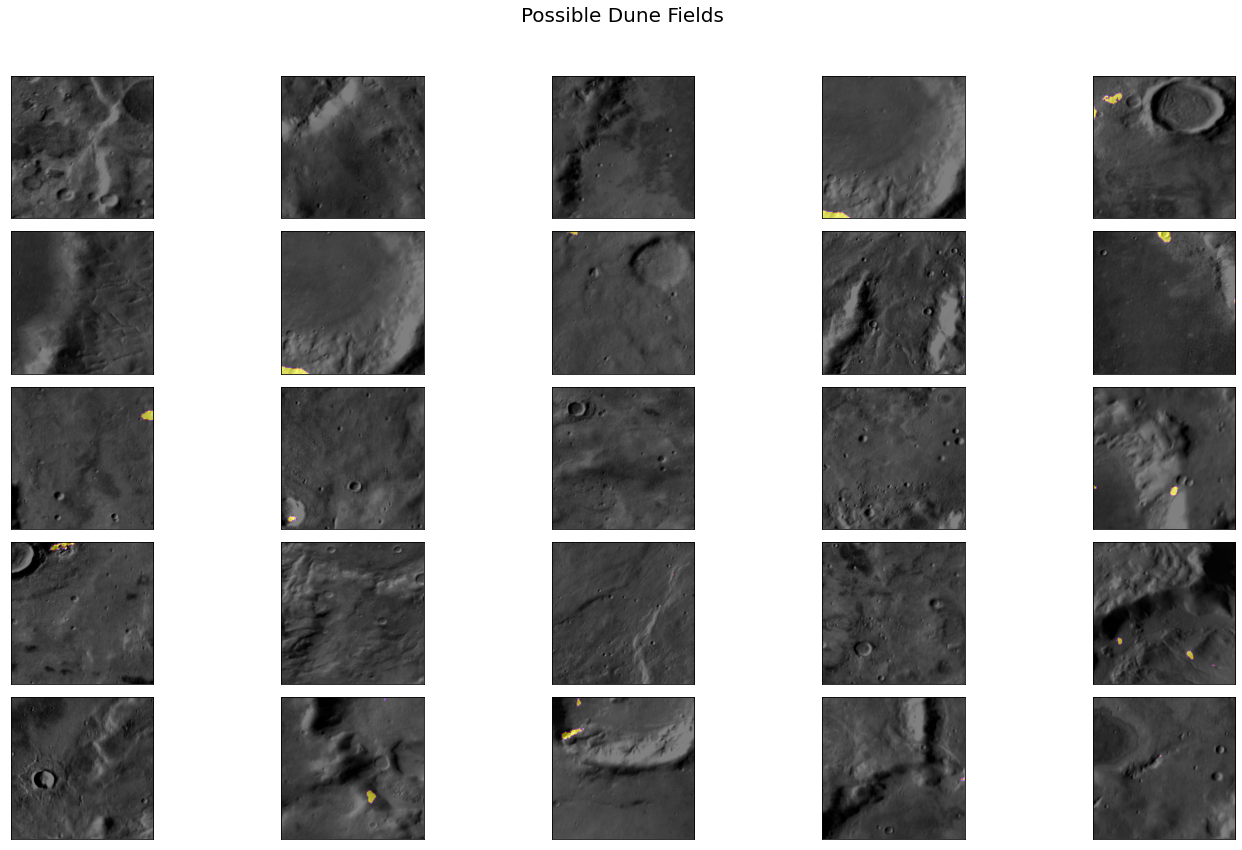

/content/gdrive/My Drive/mars_dunes_full_ds/mars_dunes_full_ds_1.npz


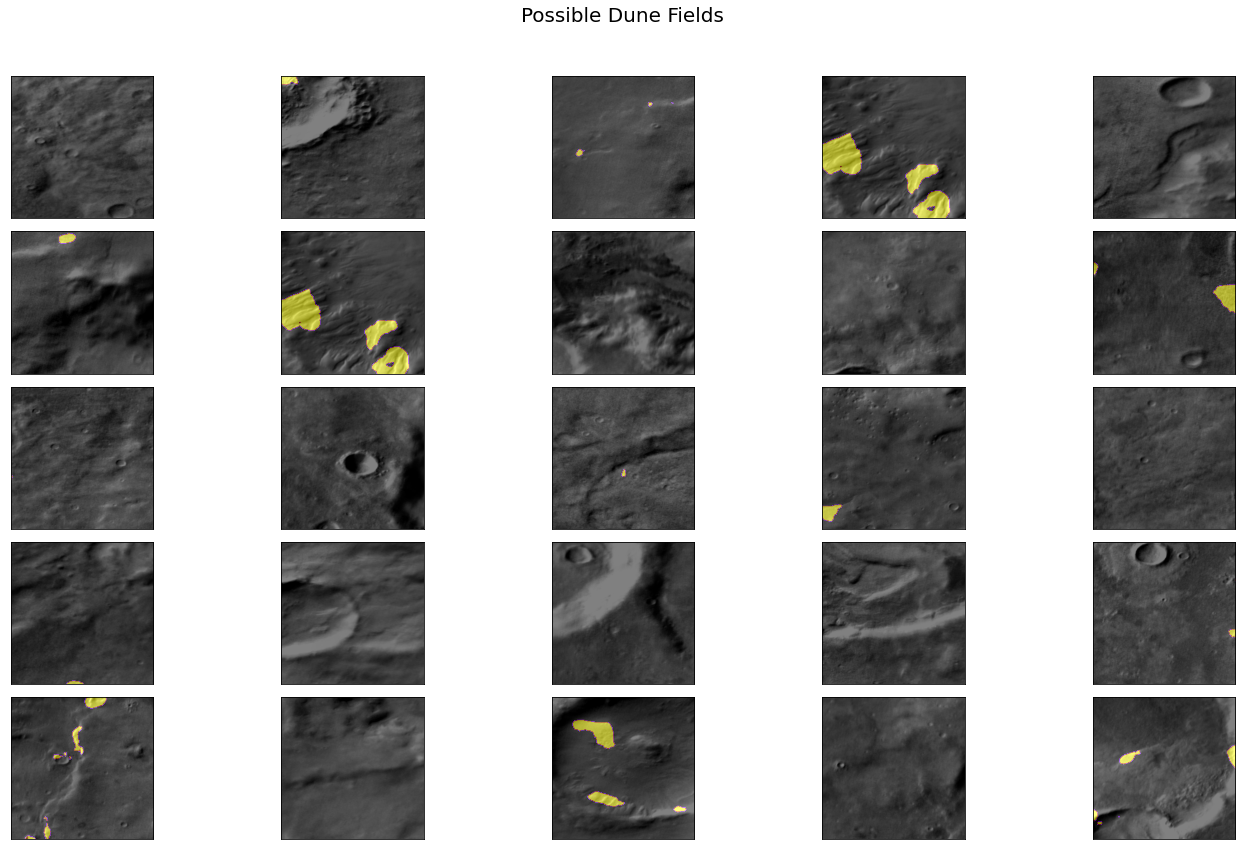

/content/gdrive/My Drive/mars_dunes_full_ds/mars_dunes_full_ds_2.npz


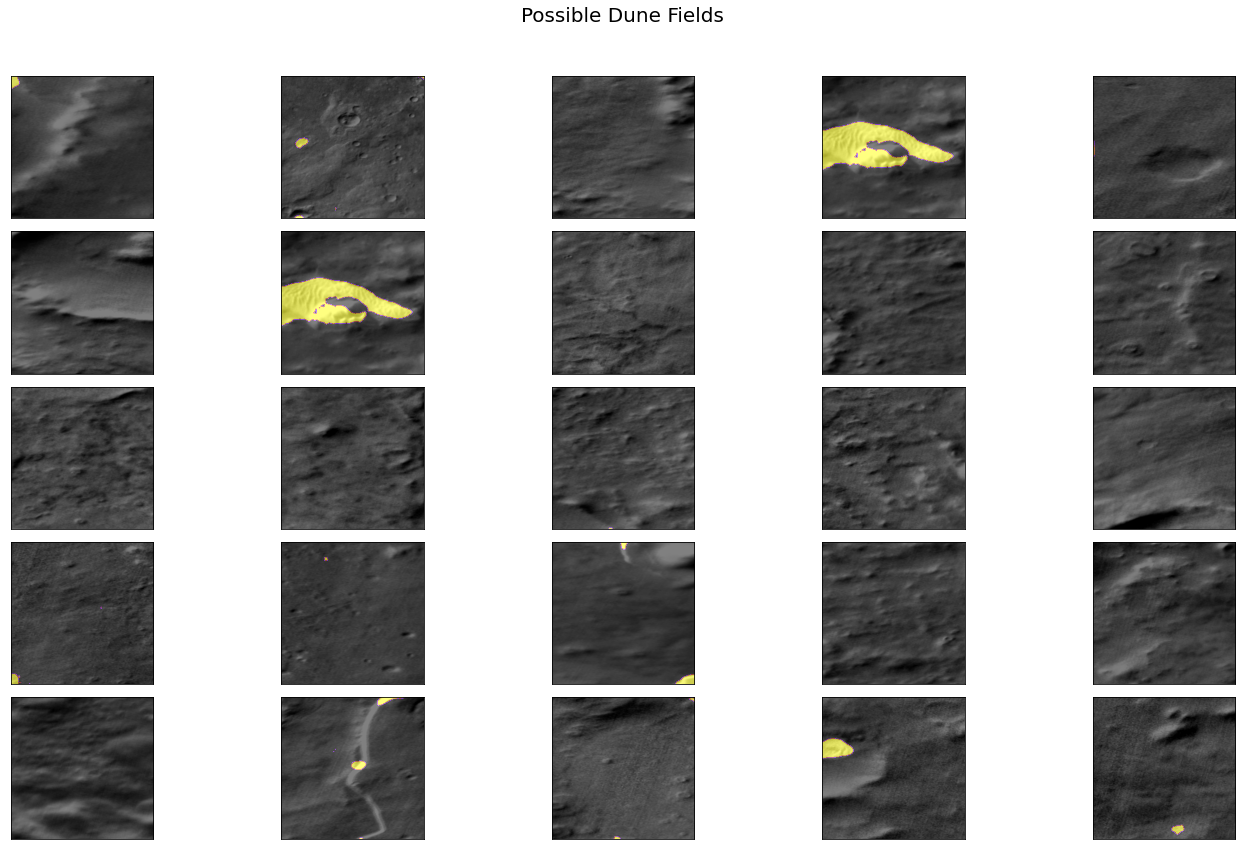

/content/gdrive/My Drive/mars_dunes_full_ds/mars_dunes_full_ds_3.npz


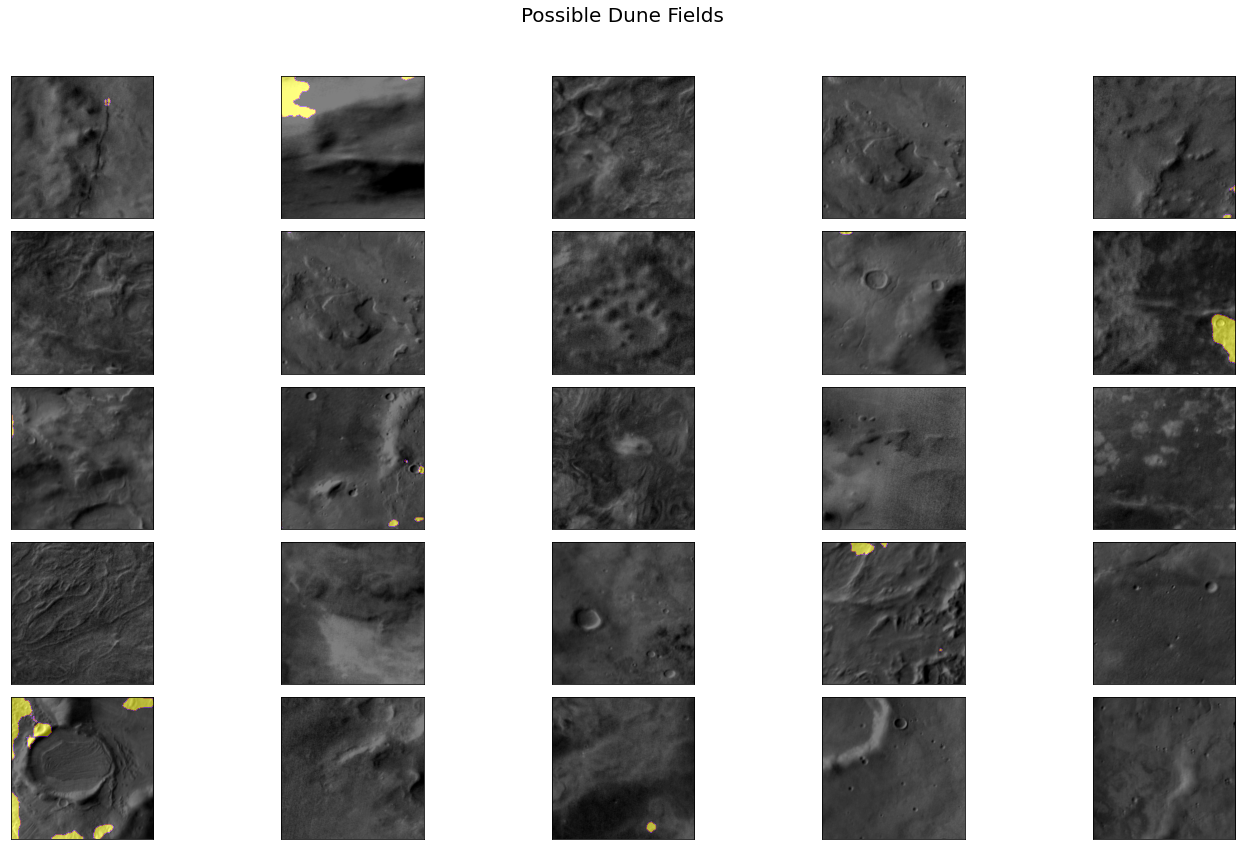

/content/gdrive/My Drive/mars_dunes_full_ds/mars_dunes_full_ds_4.npz


In [ ]:
import numpy as np

predicted_labels_list = []
predicted_data_list = []

for i in np.arange(len(file_path_list)):
  print(file_path_list[i])
  loaded = np.load(file_path_list[i], 'r')
  testing_data = loaded['data']

  #normalize data
  mean = testing_data.mean(axis=(1,2))[:,np.newaxis,np.newaxis]
  std = testing_data.std(axis=(1,2))[:,np.newaxis,np.newaxis]
  testing_data_normal = (testing_data-mean)/std

  #add dimension of 1
  testing_data = np.expand_dims(testing_data,axis=3)
  testing_data.shape

  prediction = model.predict(testing_data)
  
  # thresholding probability
  labels_pred = prediction  
  labels_pred[prediction>=0.5]=1
  labels_pred[prediction<0.5]=0

  plot_mars_dune(testing_data[:,:,:,0],labels_pred[:,:,:,0],'Possible Dune Fields')

  #clear memory/disk so the next file can be read in. See how to do this?
  del loaded
  del testing_data
  keras.backend.clear_session()


# Future work

Our training dataset included 454 hand-mapped dune fields. Using our model, we identify additional regions which may correspond to dune fields over the same region. Examples of dune fields that our model identified that were not hand-mapped are plotted above.

Next steps will involve transforming the predicted/possible dune fields back into geographic coordinates for visual inspection in GIS software. This will involve stitching image tiles together or creating polygons from the mapped dune field candidates and QC.

# Summary

We have developed a deep learning workflow that utilized the UNet convolutional neural network architecture to first test the feasibility of automated detection of dune fields on Mars from satellite images. Our final model predicts the location, geometry, and extent of dune fields with a validation accuracy of 0.97. We then apply our model to the full dataset and identify areas that may correspond to additional unmapped dune fields on Mars. This project provides a proof-of-concept that CNNs may provide an automated way of locating and mapping the extent of dune fields on the Martian surface.

